In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/bank-customer-churn-prediction/Churn_Modelling.csv


# **Data Loading**

In [2]:
bank = pd.read_csv('/kaggle/input/bank-customer-churn-prediction/Churn_Modelling.csv')
bank.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# **EDA**

In [3]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [4]:
bank.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [5]:
bank.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [6]:
bank.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
9995    False
9996    False
9997    False
9998    False
9999    False
Length: 10000, dtype: bool

NO NULL AND DUPLICATED VALUES IN THIS DATASET

In [7]:
bank.drop(['CustomerId','RowNumber','Surname'],axis=1,inplace=True)
bank.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


Removing RowNumber,CustomerId and Surname as it can make the dataset noisy

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

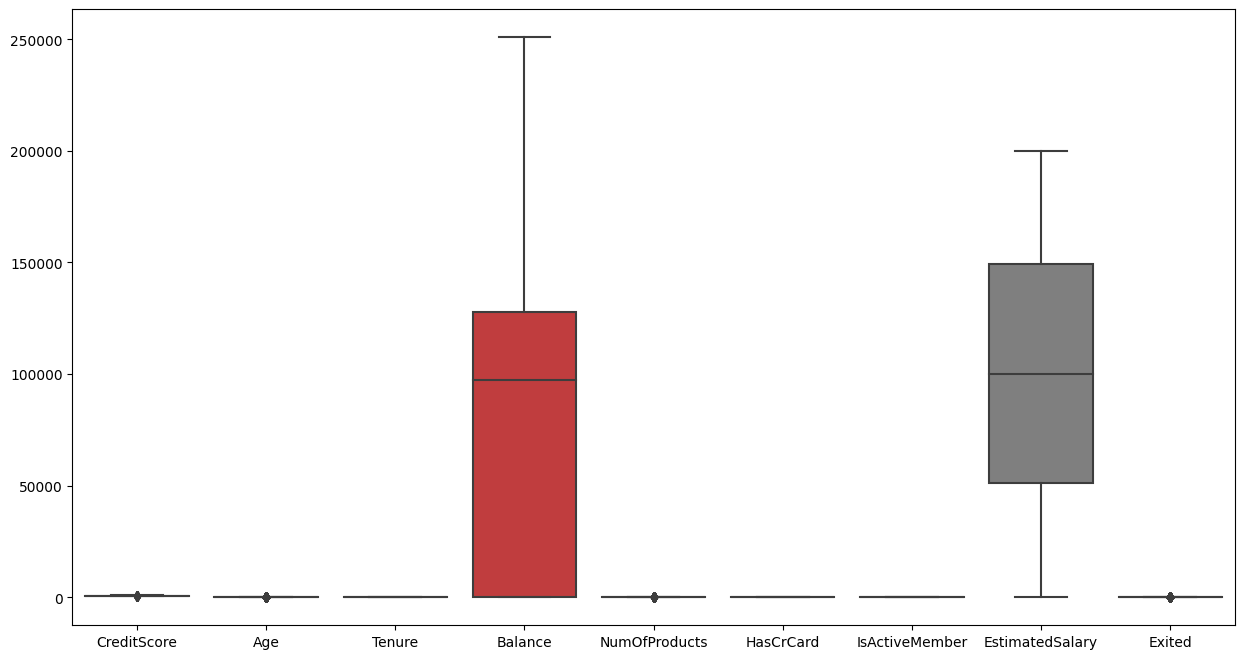

In [9]:
#Checking for outliers

plt.figure(figsize=(15,8))
sns.boxplot(data=bank)
plt.show()

<Axes: xlabel='Exited', ylabel='count'>

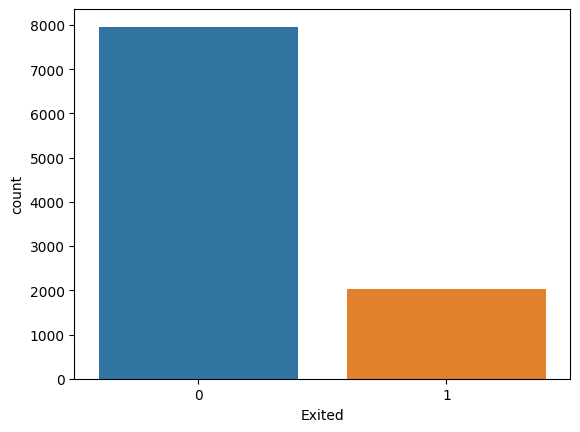

In [10]:
#plt.figure(figsize=(15,5))
sns.countplot(data=bank,x='Exited')

This Visualization of Exited tells us that most of the customer have stayed

<Axes: xlabel='IsActiveMember', ylabel='count'>

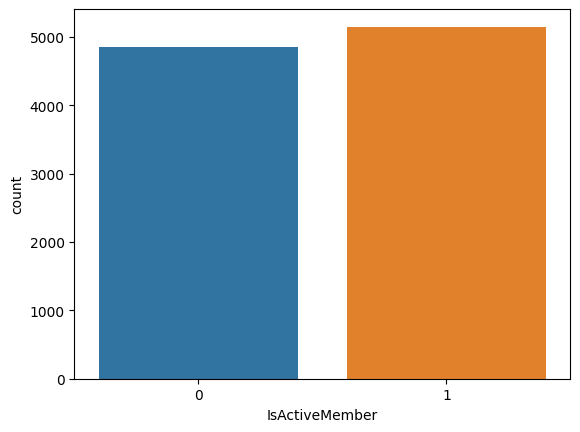

In [11]:
sns.countplot(data=bank,x='IsActiveMember')

Some of them are active members

<Axes: xlabel='HasCrCard', ylabel='count'>

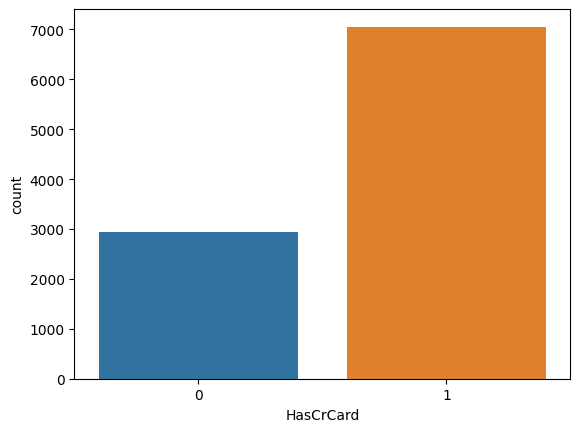

In [12]:
sns.countplot(data=bank,x='HasCrCard')

most of the customers have Credit Card available

<Axes: xlabel='Gender', ylabel='count'>

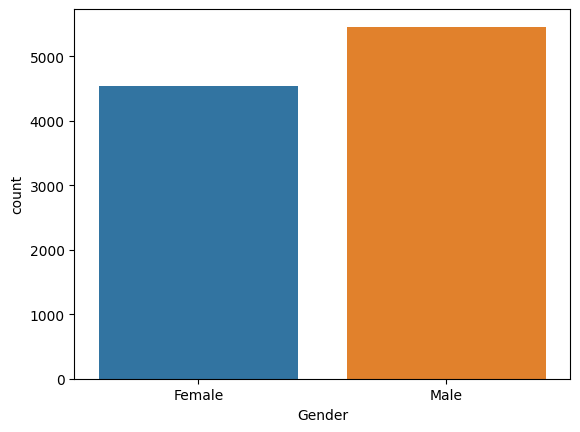

In [13]:
sns.countplot(data=bank,x='Gender')

Most of the male use Bank because females are ☕

<Axes: xlabel='Geography', ylabel='count'>

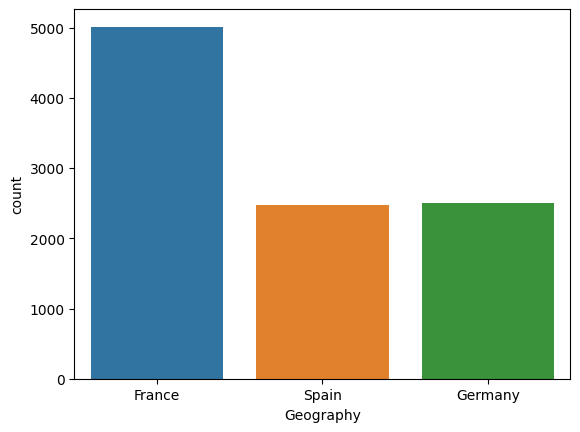

In [14]:
sns.countplot(data=bank,x='Geography')

French Customers use more Banks than Spain and Germany

<Axes: xlabel='NumOfProducts', ylabel='count'>

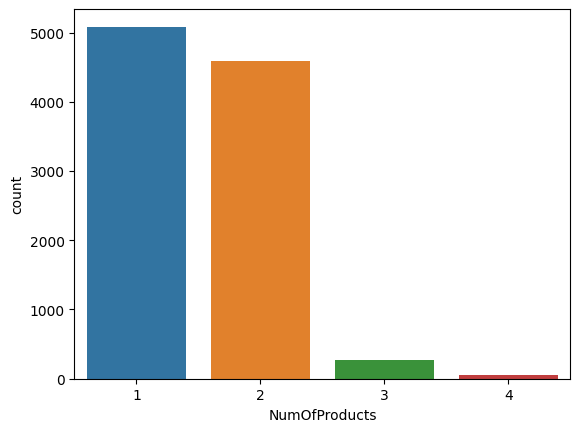

In [15]:
sns.countplot(data=bank,x='NumOfProducts')

Most of the peoples only take 1 num of product

In [16]:
bank1 = bank.copy()

Copying the dataset for backup and appling correlation to it

In [17]:
bank1.drop(['Gender','Geography'],axis=1,inplace=True)
bank1.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,42,2,0.00,1,1,1,101348.88,1
1,608,41,1,83807.86,1,0,1,112542.58,0
2,502,42,8,159660.80,3,1,0,113931.57,1
3,699,39,1,0.00,2,0,0,93826.63,0
4,850,43,2,125510.82,1,1,1,79084.10,0


Dropping Gender and Geography for Creating a Correlation as Correlation cannot be done on String Values

<Axes: >

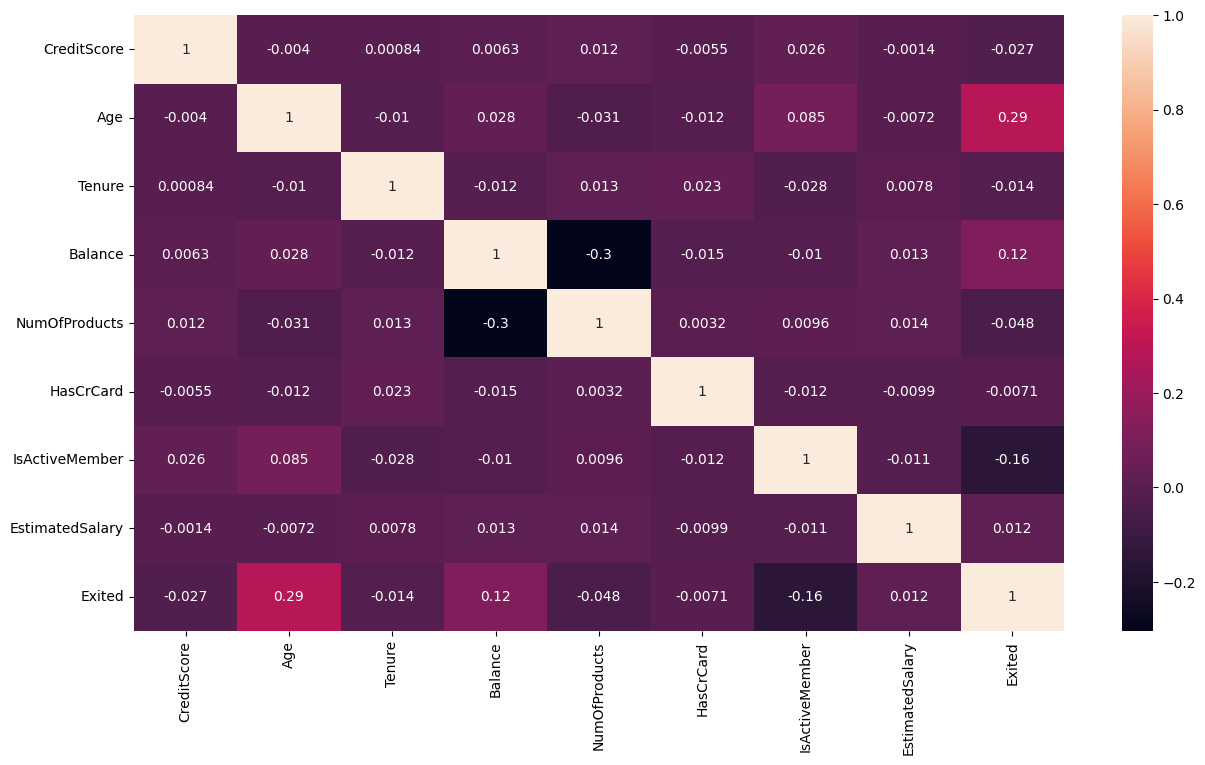

In [18]:
plt.figure(figsize=(15,8))
sns.heatmap(bank1.corr(),annot=True)

In [19]:
bank['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [20]:
#Now doing Upsampling

#class_1_upsampled = resample(class_1, replace=True, n_samples=len(class_0), random_state=42)

#upsampled_data = pd.concat([class_0, class_1_upsampled])

In [21]:
#upsampled_data['Exited'].value_counts()

In [22]:
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()
bank['Gender']=le.fit_transform(bank['Gender'])
bank['Geography']=le.fit_transform(bank['Geography'])

bank.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0


The difference b/w Min and Max of both Balance and EstimatedSalary are bigger than expected thus we are doing scaling on it to make all the values in range of 0-1

# **Feature Selection**

In [23]:
bank.nunique()

CreditScore         460
Geography             3
Gender                2
Age                  70
Tenure               11
Balance            6382
NumOfProducts         4
HasCrCard             2
IsActiveMember        2
EstimatedSalary    9999
Exited                2
dtype: int64

Extracting the features which have few unique values

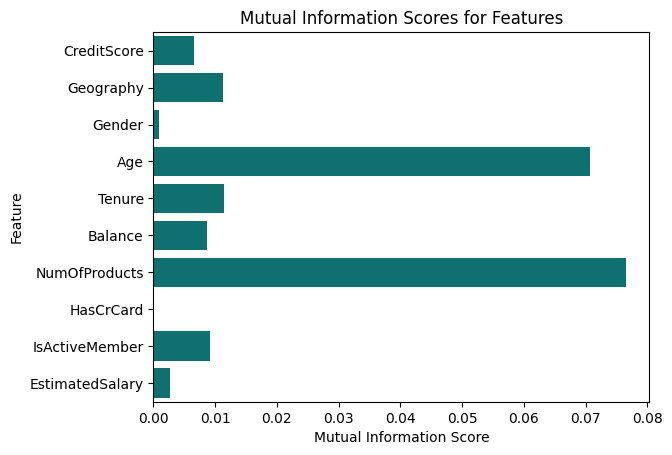

In [24]:
from sklearn.feature_selection import mutual_info_classif
x = bank.drop('Exited', axis=1)
y = bank['Exited']

mutual_info_scores = mutual_info_classif(x, y)

feature_info = pd.DataFrame({'Feature': x.columns, 'Mutual_Info_Score': mutual_info_scores})
sns.barplot(x='Mutual_Info_Score', y='Feature', data=feature_info, color='teal')
plt.title('Mutual Information Scores for Features')
plt.xlabel('Mutual Information Score')
plt.ylabel('Feature')
plt.show()

In [25]:
sorted_features = feature_info.sort_values(by='Mutual_Info_Score', ascending=False)
top_features = sorted_features.head(6)
print(top_features)

          Feature  Mutual_Info_Score
6   NumOfProducts           0.076522
3             Age           0.070726
4          Tenure           0.011407
1       Geography           0.011316
8  IsActiveMember           0.009111
5         Balance           0.008688
